In [190]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from matplotlib import style

In [191]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150
style.use('seaborn')

### Time to consensus

In [192]:
epsilons = np.arange(0.1, 0.45, 0.05)

In [193]:
rg63 = pd.read_csv('data/Random_6_4.csv', index_col=0)
rg63.head()

,100,250,500,1000,1500,2000,2500,3000,4000,5000
0,10.01,11.87,14.01,15.26,17.23,19.37,18.48,19.50,20.25,21.20
1,14.05,17.04,21.03,27.38,31.11,32.61,34.99,37.34,41.68,39.17
2,20.80,47.74,116.63,649.56,0.00,0.00,0.00,0.00,0.00,0.00
3,49.03,904.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,379.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [194]:
rg63 = rg63.transpose()
rg63.head()

,0,1,2,3,4,5,6
100,10.01,14.05,20.80,49.03,379.75,0.0,0.0
250,11.87,17.04,47.74,904.13,0.00,0.0,0.0
500,14.01,21.03,116.63,0.00,0.00,0.0,0.0
1000,15.26,27.38,649.56,0.00,0.00,0.0,0.0
1500,17.23,31.11,0.00,0.00,0.00,0.0,0.0


In [195]:
rg63.columns = [rf'$\epsilon={round(e, 2)}$' for e in epsilons]
rg63.replace(0, np.nan, inplace=True)
rg63.head()

,$\epsilon=0.1$,$\epsilon=0.15$,$\epsilon=0.2$,$\epsilon=0.25$,$\epsilon=0.3$,$\epsilon=0.35$,$\epsilon=0.4$
100,10.01,14.05,20.80,49.03,379.75,NaN,NaN
250,11.87,17.04,47.74,904.13,NaN,NaN,NaN
500,14.01,21.03,116.63,NaN,NaN,NaN,NaN
1000,15.26,27.38,649.56,NaN,NaN,NaN,NaN
1500,17.23,31.11,NaN,NaN,NaN,NaN,NaN


In [196]:
cols = rg63.iloc[:, 0:5].columns
cols

Index(['$\epsilon=0.1$', '$\epsilon=0.15$', '$\epsilon=0.2$',
       '$\epsilon=0.25$', '$\epsilon=0.3$'],
      dtype='object')

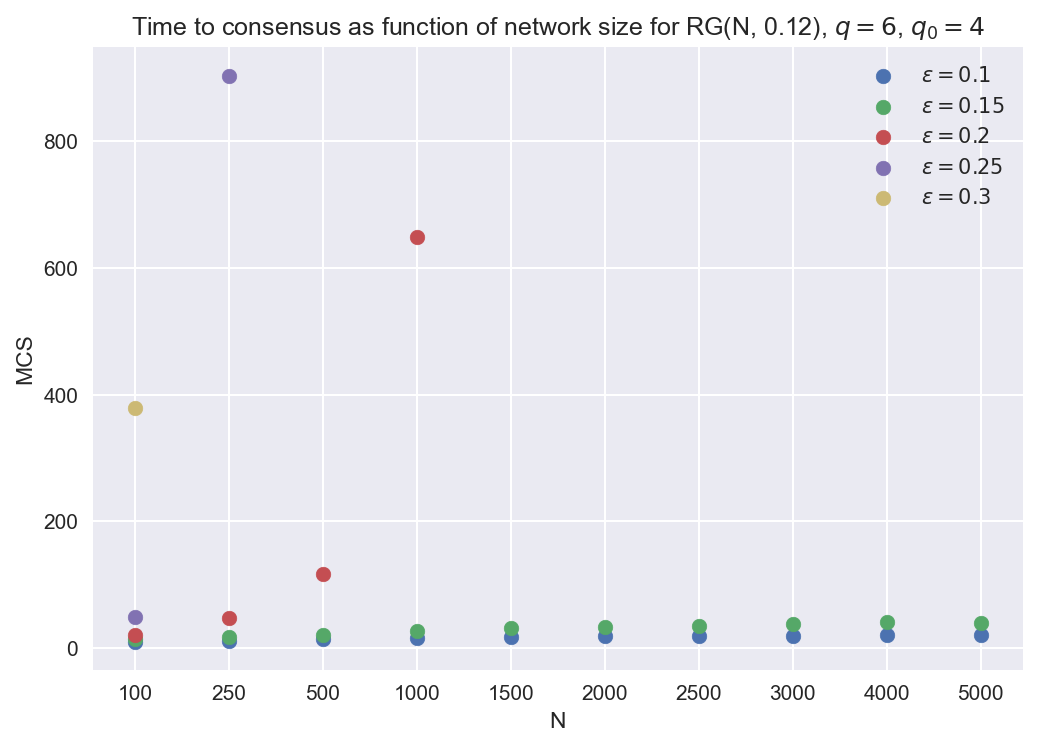

In [197]:
for col in cols:
    plt.scatter(rg63.index, rg63[col], label=col)
plt.legend()
plt.title(r'Time to consensus as function of network size for RG(N, 0.12), $q=6$, $q_0=4$')
plt.xlabel('N')
plt.ylabel('MCS')
plt.savefig('plots/Random_consensus_6_4.png')

 ### Final magnetization

In [143]:
epsilons = [0.1, 0.12, 0.15, 0.17, 0.2, 0.22, 0.25, 0.27, 0.3, 0.32, 0.35, 0.37, 0.4, 0.42, 0.47]

In [144]:
rgc1 = pd.read_csv('data/magn_watts_6_4.csv')
rgc2 = pd.read_csv('data/magn_watts_6_4b.csv')

In [145]:
rgc = pd.concat([rgc1, rgc2], axis=1)
rgc = rgc.reindex(sorted(rgc.columns), axis=1)

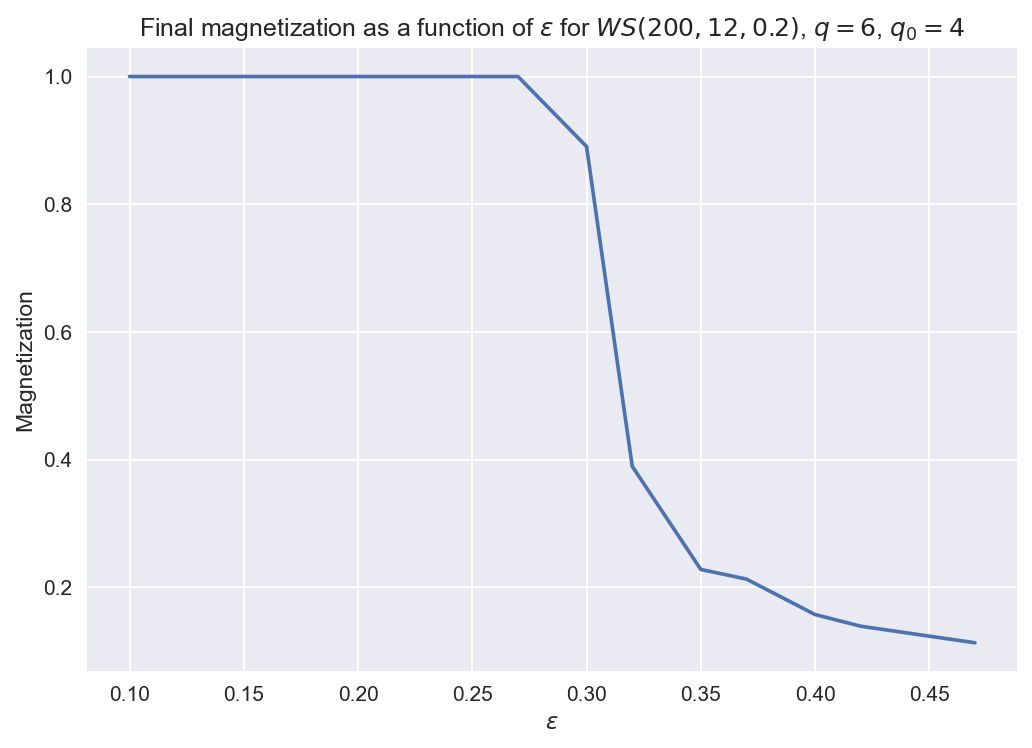

In [146]:
plt.plot(epsilons, rgc.iloc[9999, :])
plt.xlabel(r'$\epsilon$')
plt.ylabel('Magnetization')
plt.title(fr"Final magnetization as a function of $\epsilon$ for $WS(200, 12, 0.2)$, $q = 6$, $q_0 = 4$")
plt.savefig(f"plots/magn_last_watts_6_4.png")
plt.show()

### Magnetization in time

In [124]:
epsilons = [0.1, 0.12, 0.15, 0.17, 0.2, 0.22, 0.25, 0.27, 0.3, 0.32, 0.35, 0.37, 0.4, 0.42, 0.47]

In [125]:
inds = np.arange(0, len(epsilons)-1, 2)
inds

array([ 0,  2,  4,  6,  8, 10, 12])

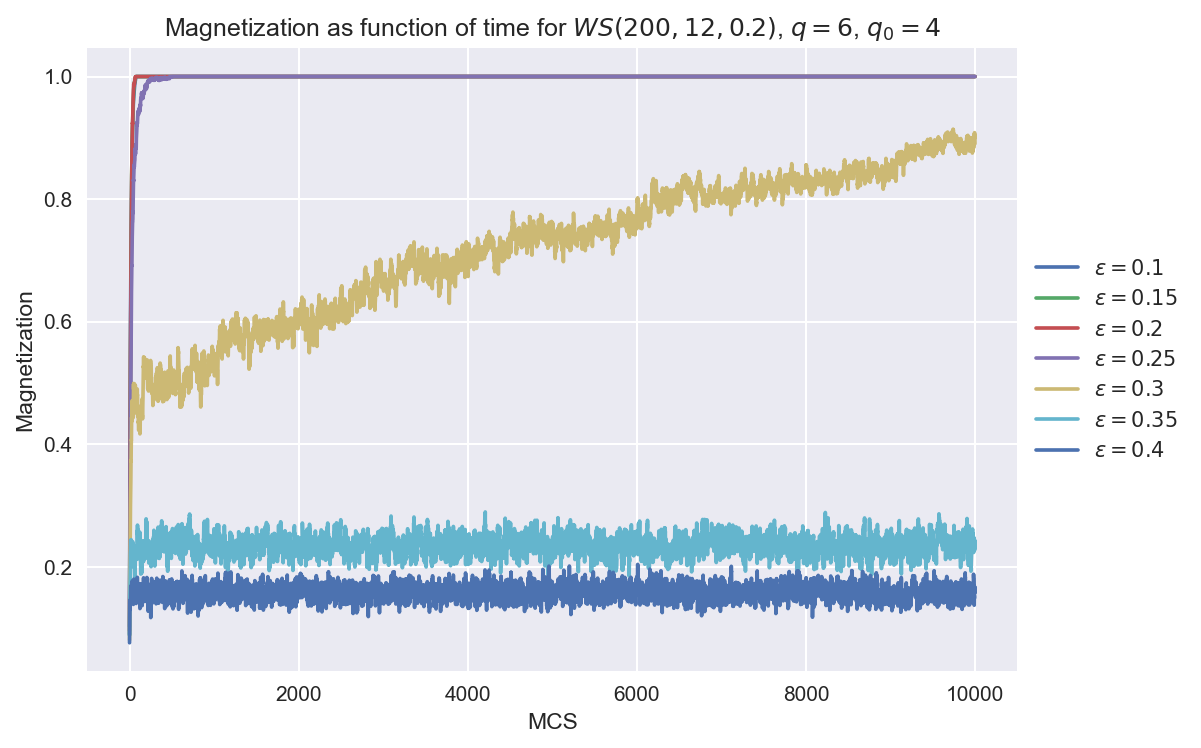

In [147]:
rgc.iloc[:, inds].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Magnetization as function of time for $WS(200, 12, 0.2)$, $q=6$, $q_0=4$')
plt.xlabel('MCS')
plt.ylabel('Magnetization')
plt.savefig('plots/magn_watts_6_4.png')

### Final concentration

In [148]:
epsilons = [0.1, 0.12, 0.15, 0.17, 0.2, 0.22, 0.25, 0.27, 0.3, 0.32, 0.35, 0.37, 0.4, 0.42, 0.47]

In [149]:
rgc1 = pd.read_csv('data/conc_watts_6_4.csv')
rgc2 = pd.read_csv('data/conc_watts_6_4b.csv')

In [150]:
rgc = pd.concat([rgc1, rgc2], axis=1)
rgc = rgc.reindex(sorted(rgc.columns), axis=1)

In [151]:
rgc

,$\epsilon=0.1$,$\epsilon=0.12$,$\epsilon=0.15$,$\epsilon=0.17$,$\epsilon=0.2$,$\epsilon=0.22$,$\epsilon=0.25$,$\epsilon=0.27$,$\epsilon=0.3$,$\epsilon=0.32$,$\epsilon=0.35$,$\epsilon=0.37$,$\epsilon=0.4$,$\epsilon=0.42$,$\epsilon=0.47$
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9452,0.6948,0.61405,0.6065,0.57875,0.5696,0.55665


In [152]:
contrary_conc = 1 - rgc
contrary_conc

,$\epsilon=0.1$,$\epsilon=0.12$,$\epsilon=0.15$,$\epsilon=0.17$,$\epsilon=0.2$,$\epsilon=0.22$,$\epsilon=0.25$,$\epsilon=0.27$,$\epsilon=0.3$,$\epsilon=0.32$,$\epsilon=0.35$,$\epsilon=0.37$,$\epsilon=0.4$,$\epsilon=0.42$,$\epsilon=0.47$
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0548,0.3052,0.38595,0.3935,0.42125,0.4304,0.44335


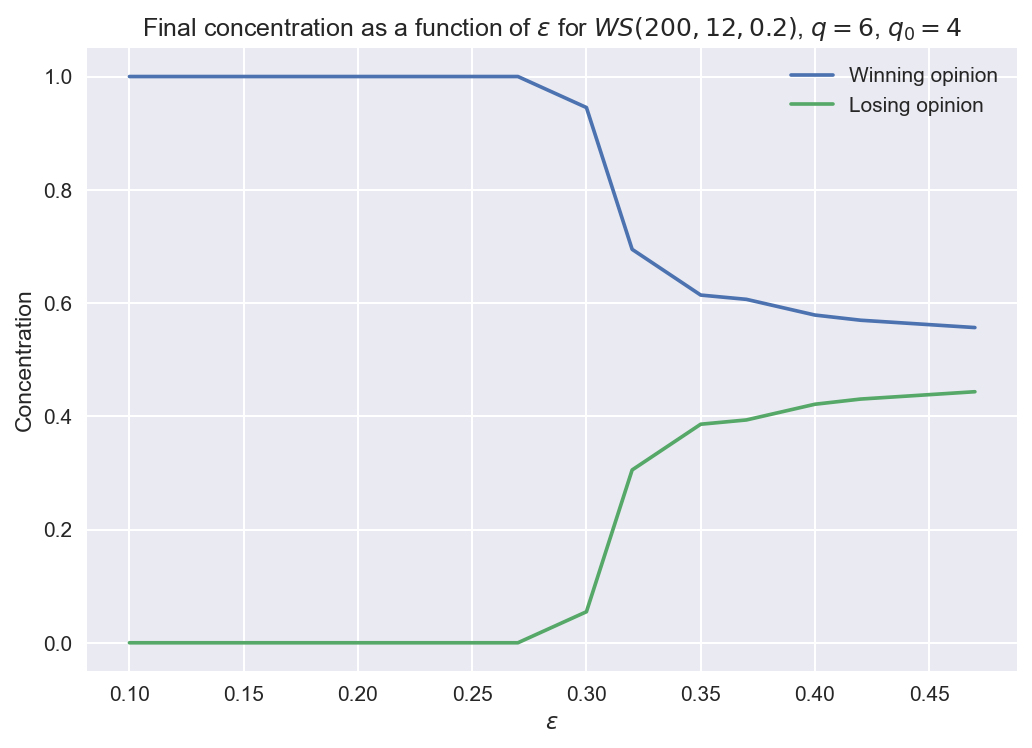

In [153]:
plt.plot(epsilons, rgc.iloc[0, :], label='Winning opinion')
plt.plot(epsilons, contrary_conc.iloc[0, :], label="Losing opinion")
plt.title(fr"Final concentration as a function of $\epsilon$ for $WS(200, 12, 0.2)$, $q = 6$, $q_0 = 4$")
plt.legend()
plt.xlabel(r'$\epsilon$')
plt.ylabel('Concentration')
plt.savefig(f"plots/conc_watts_6_4.png")